In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if (True):
  import os
  #os.chdir("drive/My Drive/")  #MAPEAR PARA O LOCAL NO DRIVE ONDE SE ENCONTRA ESSE ARQUIVO
  os.chdir("drive/My Drive/Petrobras - Meio Fraturado/Vugs Artificiais/Programas/Rotina - Test4/")

Regionprops

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

from skimage.measure import label, regionprops, regionprops_table
from skimage.io import imread, imshow
from skimage import data
from skimage.transform import rescale, resize

ValueError: ignored

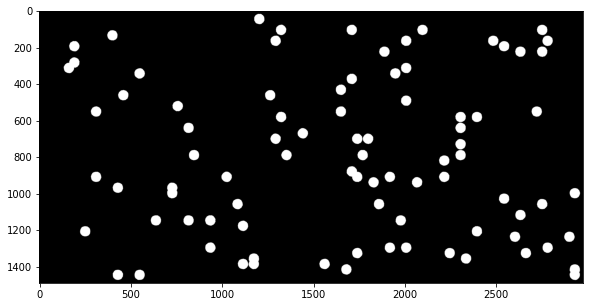

In [ ]:
image = imread('aleatory-5p-87v-grid-10-r1-round1_bw.png')

label_img = label(image)
regions = regionprops(label_img)

fig, ax = plt.subplots(figsize=[10,5])
ax.imshow(image, cmap=plt.cm.gray)
'''
for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)
'''
#ax.axis((0, 600, 600, 0))
plt.show()

In [ ]:
regproperties = pd.read_csv('aleatory-5p-87v-grid-10-r1-round1_image-data.csv', sep=',')#, header=None, names=headers)
regproperties

,label,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,centroid-0,centroid-1,convex_area,...,moments_normalized-2-1,moments_normalized-2-2,moments_normalized-2-3,moments_normalized-3-0,moments_normalized-3-1,moments_normalized-3-2,moments_normalized-3-3,orientation,perimeter,solidity
0,1,5019,23,1661,104,1741,6480,62.422993,1700.365013,5172,...,0.000055,0.004310,-0.000017,0.000149,0.000046,-1.523355e-05,3.872364e-06,0.549440,270.350288,0.970418
1,2,4989,106,1829,188,1910,6642,146.682702,1868.444779,5121,...,0.000044,0.004191,-0.000022,0.000049,-0.000010,1.791605e-05,2.442329e-06,0.729914,268.249783,0.974224
2,3,4964,107,2375,188,2454,6399,146.541499,2414.268936,5081,...,0.000138,0.004293,-0.000023,0.000186,-0.000051,-8.849969e-06,-3.947785e-06,-0.313184,266.107648,0.976973
3,4,4993,108,2920,188,3001,6480,146.649509,2960.596836,5106,...,-0.000021,0.004367,0.000003,0.000020,-0.000048,5.808174e-06,-6.381736e-07,-1.528695,268.350288,0.977869
4,5,5006,108,3845,187,3926,6399,146.666201,3884.551738,5117,...,0.000126,0.004330,0.000004,0.000166,0.000282,-1.230157e-05,3.061417e-05,1.069618,268.592929,0.978308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,5024,1912,2164,1994,2246,6724,1952.561107,2204.545581,5164,...,0.000164,0.004295,-0.000020,-0.000210,-0.000122,-7.066321e-08,-1.522592e-05,-0.510112,272.178716,0.972889
78,79,4984,1954,2334,2036,2414,6560,1994.675963,2372.677568,5118,...,0.000008,0.004294,-0.000021,-0.000094,-0.000079,1.805158e-05,-1.168925e-05,-0.362595,270.592929,0.973818
79,80,8142,1956,4096,2077,4177,9801,2015.441538,4136.362196,8420,...,0.000075,0.005073,-0.000009,0.000207,0.000119,-4.356156e-05,1.963268e-06,0.001396,361.291414,0.966983
80,81,4992,1997,738,2077,817,6320,2036.576923,776.445913,5096,...,0.000019,0.004421,-0.000003,0.000008,-0.000022,7.908972e-07,-2.129491e-06,-0.244629,268.107648,0.979592


In [ ]:
lin,col = regproperties.shape
SL = 4200
SH = 2100
i = 0
eccentricity = regproperties.loc[:,"eccentricity"]
area = regproperties.loc[:,"area"]
orientation = regproperties.loc[:,"orientation"]*(180/pi)
minc = regproperties.loc[:,"bbox-1"]
maxc = regproperties.loc[:,"bbox-3"]
Lx = maxc-minc

phi_m = sum(area)/(SL*SH)
lx = (np.average(a=Lx,weights=regproperties["area"])/SL)*100
orient = sum((abs(orientation)/90)*area)/sum(area)
ecc = np.average(a=eccentricity,weights=regproperties["area"])


In [ ]:
circle = regproperties.loc[:,"major_axis_length"] - regproperties.loc[:,"minor_axis_length"]
aux_rad = np.zeros(len(circle),dtype=int)
for i in range(len(circle)):
  if abs(circle[i]) >= 10:
    aux_rad[i] = 1
aux_rad

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
aux_rad = np.zeros(len(circle),dtype=int)

In [ ]:
orientation = aux_rad*abs(regproperties.loc[:,"orientation"]*(180/pi))
if all(orientation == 0):
  print(True)

True


In [ ]:
orientation

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
Name: orientation, Length: 82, dtype: float64

In [ ]:
orient = sum((abs(orientation)/90)*aux_rad*area)/sum(aux_rad*area)
orient

0.21579992021391278

In [ ]:
headers = ['P_Area_100','WAv_Lx','Alignment','Eccent']
pd.DataFrame([phi_m,lx,orient,ecc],index=headers).T

,P_Area_100,WAv_Lx,Alignment,Eccent
0,0.048408,1.966332,0.518037,0.190709


In [ ]:
keq = 1+(7.03*(phi_m**1.66)*(lx**0.47)*(orient**0.40)*(ecc**0.08))
print(keq,phi_m,lx,orient,ecc)

1.0426690669624943 0.04840816326530612 1.9663324656263106 0.5180373007311336 0.19070934757083016


In [ ]:
keq = 1+(7.03*((4.838345/100)**1.66)*(((82.585879/SL)*100)**0.47)*(0.512246**0.40)*(0.189315**0.08))
keq

1.042416697993262

In [ ]:
image = imread('aleatory-5p-87v-grid-10-r1-round1_bw.png')
image_resized = resize(image,(2100, 4200),anti_aliasing=True)
label_img = label(image)
regions = regionprops(label_img)
label_img.shape

(1488, 2976, 4)

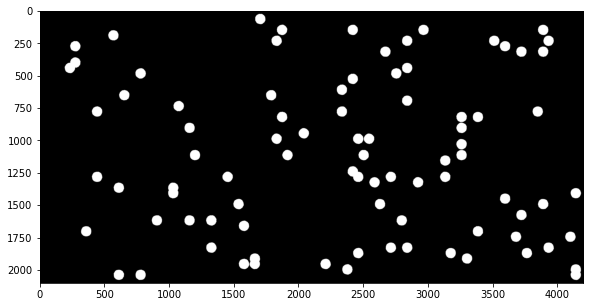

In [ ]:
fig, ax = plt.subplots(figsize=[10,5])
ax.imshow(image_resized, cmap=plt.cm.gray)

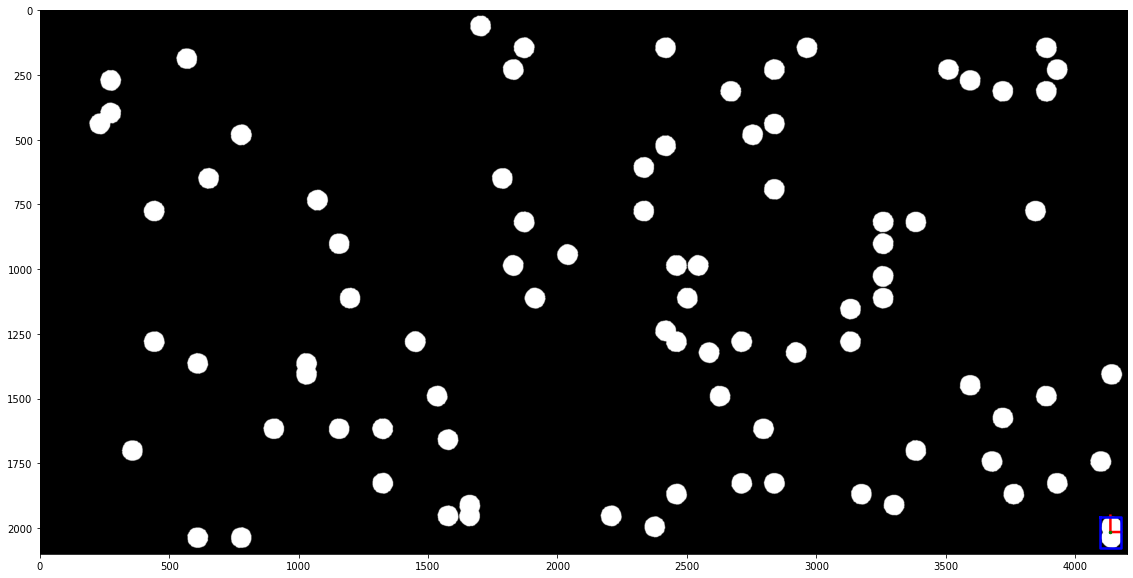

In [ ]:
fig, ax = plt.subplots(figsize=[20,10])

ax.imshow(image_resized, cmap=plt.cm.gray)

for i in range(79,80,1):
    y0 = regproperties.loc[i,"centroid-0"]
    x0 = regproperties.loc[i,"centroid-1"]
    orientation = regproperties.loc[i,"orientation"]
    axis_minor_length = regproperties.loc[i,'minor_axis_length']
    axis_major_length = regproperties.loc[i,'major_axis_length']
    minr = regproperties.loc[i,"bbox-0"]
    minc = regproperties.loc[i,"bbox-1"]
    maxr = regproperties.loc[i,"bbox-2"]
    maxc = regproperties.loc[i,"bbox-3"]

    x1 = x0 + math.cos(orientation) * 0.5 * axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=5)

    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    lx = maxc-minc
    ax.plot(bx, by, '-b', linewidth=2.5)

#ax.axis((0, 600, 600, 0))
plt.show()

In [ ]:
lx

123

In [ ]:
summary_properties

,Macroporosity,Vugs,Sample,Grid,R,P_Area_100,WAv_Lx,Alignment,Eccent,keq_fit,keq_simulation,Relative_error2
0,0.02,35,aleatory,grid-10,r1,0.019577,1.95762,0.630302,0.147216,1.01005,1.04175,0.030430
1,0.02,35,aleatory,grid-15,r1,0.019743,1.98451,0.598945,0.154857,1.01010,1.04186,0.030489
2,0.02,35,aleatory,grid-19,r1,0.019828,2.12784,0.636082,0.212025,1.01104,1.04273,0.030399
3,0.02,35,aleatory,grid-20,r1,0.019792,1.91568,0.533688,0.116170,1.00931,1.04259,0.031917
4,0.02,35,aleatory,grid-30,r1,0.019753,1.91088,0.610818,0.122273,1.00981,1.04129,0.030228
...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.44,330,aleatory,grid-30,r2,0.438637,3.20477,0.542636,0.171415,3.10628,3.66802,0.153147
249,0.45,338,aleatory,grid-15,r2,0.376945,5.48784,0.532409,0.609550,3.31780,2.94009,0.128468
250,0.45,338,aleatory,grid-23,r2,0.412913,7.17843,0.486405,0.672711,3.97477,3.54640,0.120791
251,0.45,338,aleatory,grid-29,r2,0.450927,44.21450,0.796980,0.821187,10.96230,15.44590,0.290277


In [ ]:
exp = summary.iloc[0,2:5].values
brinkman = summary.iloc[10,2:5].values
darcy = summary.iloc[12,2:5].values
drag_avg = summary.iloc[16,2:5].values
drag_thick = summary.iloc[18,2:5].values
regproperties.loc[]

In [ ]:
deviation = ((exp-drag_thick)/exp)*100
error = pd.Series(deviation, index=["T1", "T2", "T3"])

Plot Residuals

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi,sqrt
from statistics import mean
from sklearn.metrics import mean_squared_error

In [18]:
# library & dataset
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat

In [ ]:
print(os.getcwd())

/content/drive/MyDrive/Petrobras - Meio Fraturado/Vugs Artificiais/Programas/Rotina - Test4


In [ ]:
summary_properties = pd.read_csv('data_summary.txt', sep=',')
summary_properties = summary_properties[(summary_properties.keq_simulation>0)&(summary_properties.Macroporosity<0.31)]
#lin,col = regproperties.shape
#eccentricity = summary_properties.loc[:,"eccentricity"]
X = summary_properties.loc[:,"P_Area_100"]
Y = summary_properties.loc[:,"keq_simulation"]
Y_pred = summary_properties.loc[:,"keq_fit"]

# Mean X and Y
#mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(Y)

# Calculating Root Mean Squares Error
""" ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = 1 + b0* X[i] + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2) """

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2



#Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

0.09877283607686208
0.9336373061212964


In [ ]:
numer = 0
denom = 0
ErrRel = mean((abs(Y - Y_pred))/Y)*100
print(ErrRel)
#ErrRel2 = sum(sqrt((Y - Y_pred)**2))/sum(Y)
for i in range(m):
    numer += sqrt((Y[i] - Y_pred[i])**2)
    denom += Y[i]
ErrRel2 = (numer/denom)*100
print(ErrRel,ErrRel2)

5.093033246979987


KeyError: ignored

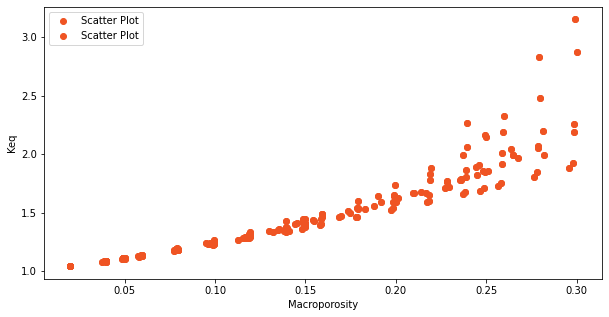

In [ ]:
plt.subplots(figsize=[10,5])
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.xlabel('Macroporosity')
plt.ylabel('Keq')
plt.legend()
plt.show()

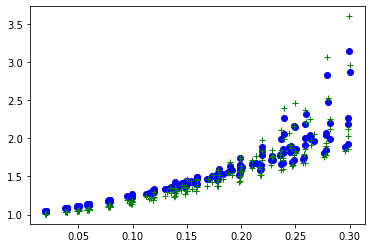

In [ ]:
plt.plot(X, Y, 'bo', label='data')
plt.plot(X, Y_pred, 'g+')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


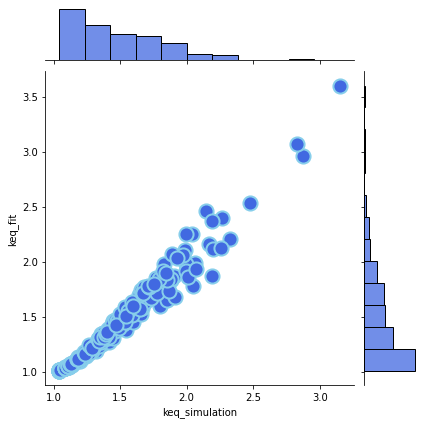

In [ ]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(Y,Y_pred, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


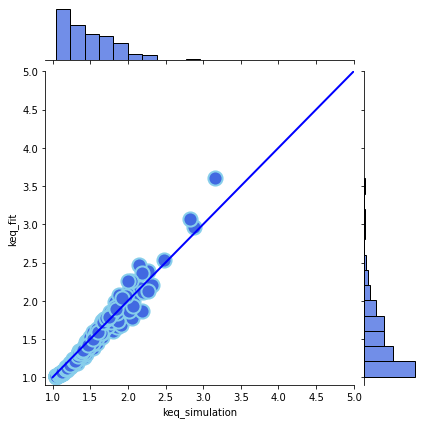

In [ ]:
sns_plot = sns.jointplot(Y,Y_pred, kind='scatter', xlim=[0.9,5.0], ylim=[0.9,5.0], s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,5], [1,5], color="b", linewidth = 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


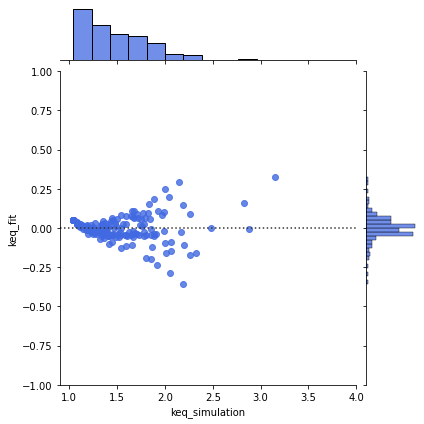

In [ ]:
sns.jointplot(Y, Y_pred, kind='resid', xlim=[0.9,4.0], ylim=[-1.0,1.0], color='royalblue')

In [ ]:
summary_properties.head()

,Macroporosity,Vugs,Sample,Grid,R,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,keq_fit,keq_simulation,Relative_error2
0,0.02,35,aleatory,grid-10,r1,0.019577,1.95762,0.630302,0.046894,0.147216,1.01005,1.04175,0.030430
1,0.02,35,aleatory,grid-15,r1,0.019743,1.98451,0.598945,0.054035,0.154857,1.01010,1.04186,0.030489
2,0.02,35,aleatory,grid-19,r1,0.019828,2.12784,0.636082,0.114909,0.212025,1.01104,1.04273,0.030399
3,0.02,35,aleatory,grid-20,r1,0.019792,1.91568,0.533688,0.010000,0.116170,1.00931,1.04259,0.031917
4,0.02,35,aleatory,grid-30,r1,0.019753,1.91088,0.610818,0.010000,0.122273,1.00981,1.04129,0.030228


In [ ]:
summary_30 = summary_properties[(summary_properties.Macroporosity<0.31) & (summary_properties.keq_simulation>0)]
X30 = summary_30.loc[:,"P_Area_100"]
Y30 = summary_30.loc[:,"keq_simulation"]
Y_pred30 = summary_30.loc[:,"keq_fit"]

# Mean X and Y
#mean_x = np.mean(X)
mean_y30 = np.mean(Y)

# Total number of values
m30 = len(Y30)

# Calculating Root Mean Squares Error
""" ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = 1 + b0* X[i] + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2) """

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

#Y_pred = X.dot(newB)

print(rmse(Y30, Y_pred30))
print(r2_score(Y30, Y_pred30))

0.09877283607686208
0.9336373061212964


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#reg = LinearRegression()
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y30, Y_pred30))
#r2 = reg.score(X, Y)
print(rmse)
#print(r2)
summary_30.Relative_error2.max()


NameError: ignored

In [ ]:
ErrRel = mean((abs(Y30 - Y_pred30))/Y30)*100
numer2 = 0
denom2 = 0
ErrRel2 = (sum(abs(Y_pred30 - Y30))/sum(Y30))*100
'''
for i in range(m30):
    print(Y30[i],Y_pred30[i])
    numer2 += sqrt((Y30[i] - Y_pred30[i])**2)
    denom2 += Y30[i]
ErrRel2 = (numer2/denom2)*100
#ErrRel2 = sum(sqrt((Y30 - Y_pred30)**2))/sum(Y30)
print(ErrRel,ErrRel2)
'''
print(ErrRel,ErrRel2)

5.093033246979987 5.20152167143997


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


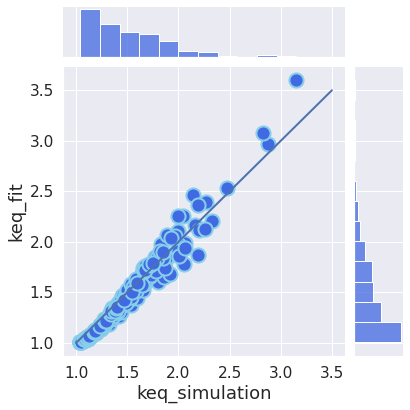

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Y30,Y_pred30, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,3.5], [1,3.5], color="b", linewidth = 2)
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


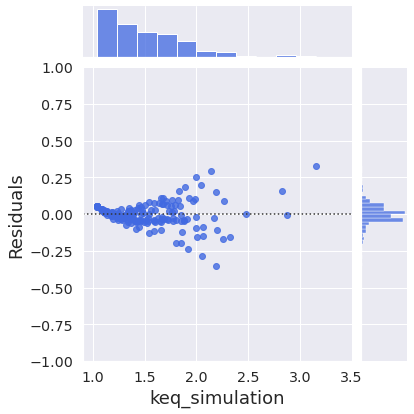

In [ ]:
sns.set(font_scale=1.3)
sns_plot = sns.jointplot(Y30, Y_pred30, kind='resid', xlim=[0.90,3.5], ylim=[-1.0,1.0], color='royalblue')
sns_plot.set_axis_labels('keq_simulation', 'Residuals', fontsize=18)

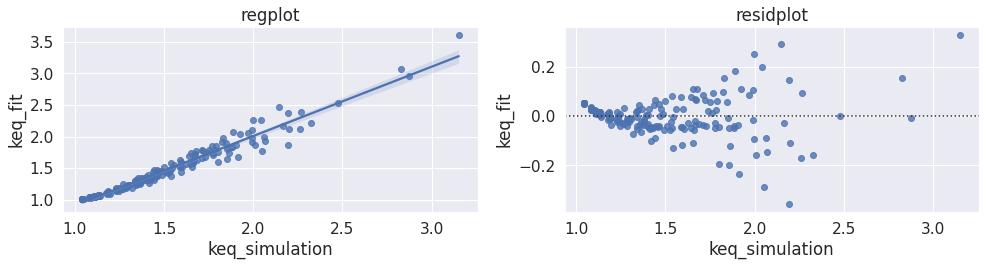

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4), sharex=True)
sns.regplot(data=summary_30, x="keq_simulation", y="keq_fit", ax=ax1)
ax1.set_title("regplot")
sns.residplot(data=summary_30, x="keq_simulation", y="keq_fit", ax=ax2)
ax2.set_title("residplot")

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

x = summary_30["P_Area_100"]
y = summary_30["keq_simulation"]-summary_30["keq_fit"]
#regr = stats.linregress(x, y)
#y -= x
#y -= regr.slope * x + regr.intercept  # calculate the residuals
len(x)

180

Text(0.5, 1.0, 'residplot')

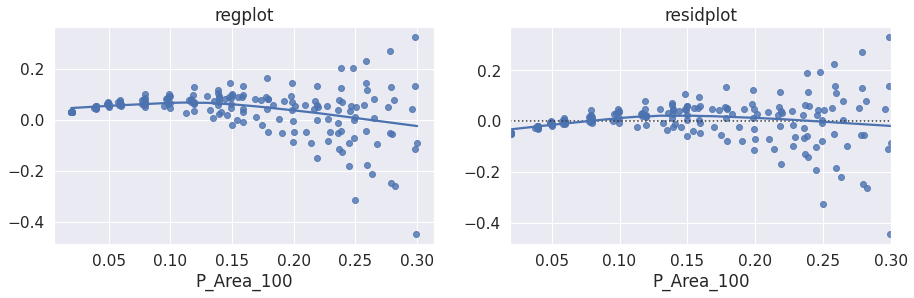

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
sns.regplot(x=x, y=y, lowess=True, ax=ax1)
ax1.set_title('regplot')
sns.residplot(x=x, y=y, lowess=True, ax=ax2)
ax2.set_title('residplot')

In [ ]:
import statsmodels.api as sm

#define response variable
#y = df['y']

#define explanatory variable
#x = df['x']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#display standardized residuals
print(standardized_residuals)

[ 0.63392159  0.63306292  0.63287354  0.61376408  0.63713771  0.34119729
  0.32273988  0.33975783  0.30070576  0.31660592  0.19944811  0.15995285
  0.18242122  0.09225482  0.14151302  0.06995555  0.05539848  0.09851071
 -0.06068447  0.06396462 -0.110266   -0.16093884 -0.07929609 -0.41976577
 -0.17765643 -0.2020978  -0.2569962  -0.32427576 -0.47249137 -0.28734482
 -0.21663196 -0.29461283 -0.1228677  -0.85465295 -0.46179233 -0.48358279
 -0.26997072 -0.5630101  -0.76737189 -0.6247858  -0.42880971 -0.39390041
 -0.50103438 -1.20301038 -0.42789452 -0.60093025 -0.54962056  0.12481567
 -1.07063536 -0.49573976 -0.49345411 -0.47636703 -0.62399379 -1.5611628
 -0.54635218 -0.28643847 -0.53966146  0.24173484 -1.40938333 -0.69153577
 -0.31877193 -0.43471981 -0.59335473 -1.3060972  -0.5164795  -0.2398312
  0.13937732 -1.06681272 -2.34341014 -0.66559871 -0.43733493  0.28261716
 -0.32574897 -2.39450004 -0.39133166 -0.32153013 -0.42756859 -1.92270606
 -2.83920087 -0.50333292 -0.56947552 -0.20675832 -0.0

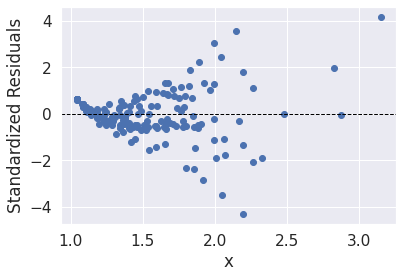

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(summary_30["keq_simulation"], standardized_residuals)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

##Regression predictions

In [4]:
#old_matlab = pd.read_csv('data-imgesim-test5-seed1-matlab.csv', sep=',')
matlab = pd.read_csv('data-all-test4-seed.csv', sep=',')
'''summary_properties = pd.read_csv('data_summary.txt', sep=',')
old_matlab = summary_properties[(summary_properties.Macroporosity<0.50) & (summary_properties.keq_simulation>0)]'''
old_matlab = matlab[(matlab.Seed==1)]
old_matlabtest = matlab[(matlab.Seed!=1)]
len(old_matlabtest)

114

In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
## choose the input and output variables
def func(x, a, b, c, d, e):
    return 1 + (a*(x[0]**b)*(x[1]**c)*(x[2]**d)*(x[3]**e))

#keq_simulation = summary_properties.loc[:,"keq_kpm"]
phi_m = old_matlab.loc[:,"P_Area_100"]
lx = old_matlab.loc[:,"WAv_Lx"]
orient = old_matlab.loc[:,"Alignment"]
ecc = old_matlab.loc[:,"Eccent"]

xdata = np.array([phi_m,lx,orient,ecc])#.T
y = func(xdata, 2.5, 1.3, 0.5, 2.0, 0.2)
ydata = np.array(old_matlab["keq_kpm"])
#ydata = np.array(old_matlab["keq_simulation"])
print(len(xdata[0]),len(y),len(ydata))

57 57 57


In [7]:
#summary_30 = pd.read_csv('data-all-test4-seed.csv', sep=',')
summary_properties = pd.read_csv('data_summary.txt', sep=',')
summary_30 = summary_properties[(summary_properties.Macroporosity<0.50) & (summary_properties.keq_simulation>0)]
Xtest = summary_30.loc[:,"P_Area_100"]
Ytest = summary_30.loc[:,"keq_simulation"]
#Ytest = summary_30.loc[:,"keq_kpm"]

def x_param(summary_30):
  phi_m = summary_30.loc[:,"P_Area_100"]
  lx = summary_30.loc[:,"WAv_Lx"]
  orient = summary_30.loc[:,"Alignment"]
  ecc = summary_30.loc[:,"Eccent"]
  xdata = np.array([phi_m,lx,orient,ecc])#.T
  return xdata
xdatatest = x_param(summary_30)

In [8]:
# curve fit
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([7.02822129, 1.65965501, 0.46874139, 0.39337338, 0.08093291])

In [9]:
from statistics import mean
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def ErrRel(Y, Y_pred):
  return mean((abs(Y - Y_pred))/Y)*100

def ErrRel2(Y, Y_pred):
  return (sum(abs(Y_pred - Y))/sum(Y))*100

Y = old_matlab["keq_kpm"]
#Y = old_matlab["keq_simulation"]
Ypred = func(xdata, *popt)

print(rmse(Y, Ypred),r2_score(Y, Ypred),ErrRel(Y, Ypred),ErrRel2(Y, Ypred))

0.1761730195068227 0.9663083804809983 5.935815308679429 6.142494598951057


In [13]:
mse = mean_squared_error(Y, Ypred)
rmse = math.sqrt(mse)
print(rmse)

0.17617301950682268


In [14]:
import numpy as np

absError = Ypred - Y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(Y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 0.1761730195068227
R-squared: 0.9670449007144897


In [ ]:
len(Y)

57

In [15]:
SSE = sum((Y - Ypred)**2)
sA = len(Y)
sCTE = len(popt)
sCoef = sCTE - 1
DFE = sA - sCTE - 1
MSE = SSE/DFE
S = sqrt(MSE)
RMSE = sqrt(mean((Y - Ypred)**2))
RMSE2 = sqrt(sum((Y - Ypred)**2)/(sA - sCTE))
ErrRel = mean((abs(Y - Ypred))/Y)*100
ErrRel2 = (sum(np.sqrt((Y - Ypred)**2))/sum(Y))*100
print(RMSE,RMSE2,S,ErrRel,ErrRel2)

0.17617301950682268 0.18444851114578467 0.18624805142934506 5.935815308679429 6.142494598951057


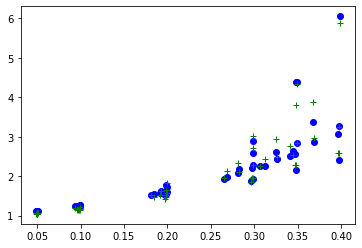

In [ ]:
plt.plot(xdata[0], ydata, 'bo', label='data')
plt.plot(xdata[0], func(xdata, *popt), 'g+',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))

In [27]:
Xtestmatlab = old_matlabtest.loc[:,"P_Area_100"]
Ytestmatlab = old_matlabtest.loc[:,"keq_kpm"]
#Ytest = summary_30.loc[:,"keq_kpm"]

def x_param(summary_30):
  phi_m = summary_30.loc[:,"P_Area_100"]
  lx = summary_30.loc[:,"WAv_Lx"]
  orient = summary_30.loc[:,"Alignment"]
  ecc = summary_30.loc[:,"Eccent"]
  xdata = np.array([phi_m,lx,orient,ecc])#.T
  return xdata
xdatatestmatlab = x_param(old_matlabtest)
Ypredtestmatlab = func(xdatatestmatlab, *popt)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


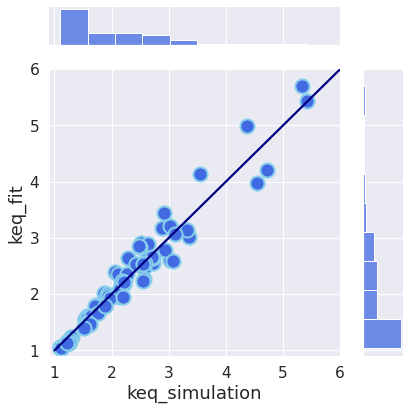

In [20]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Ytestmatlab,Ypredtestmatlab, kind='scatter', xlim=[0.9,6.0], ylim=[0.9,6.0] , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


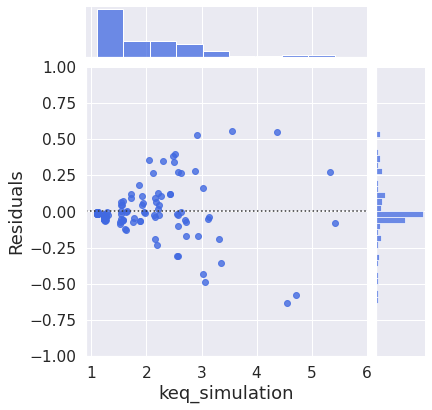

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Ytestmatlab,Ypredtestmatlab, kind='resid', xlim=[0.90,6.0], ylim=[-1.0,1.0], color='royalblue')
sns_plot.set_axis_labels('keq_simulation', 'Residuals', fontsize=18)

In [28]:
from statistics import mean
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def ErrRel(Y, Y_pred):
  return mean((abs(Y - Y_pred))/Y)*100

def ErrRel2(Y, Y_pred):
  return (sum(abs(Y_pred - Y))/sum(Y))*100

Ypredtest = func(xdatatest, *popt)

print(rmse(Ytest, Ypredtest),r2_score(Ytest, Ypredtest),ErrRel(Ytest, Ypredtest),ErrRel2(Ytest, Ypredtest))


0.42071768646201896 0.9128785675056038 6.693264626156273 8.748348880210907


In [29]:
def model_deviation(Y,Ypred,popt):
  SSE = sum((Y - Ypred)**2)
  sA = len(Y)
  sCTE = len(popt)
  sCoef = sCTE - 1
  DFE = sA - sCTE - 1
  MSE = SSE/DFE
  S = sqrt(MSE)
  RMSE = sqrt(mean((Y - Ypred)**2))
  RMSE2 = sqrt(sum((Y - Ypred)**2)/(sA - sCTE))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(np.sqrt((Y - Ypred)**2))/sum(Y))*100
  print(RMSE,RMSE2,S,ErrRel,ErrRel2)
  return

model_deviation(Ytest,Ypredtest,popt)

0.4207176864620189 0.42493762844317806 0.42579695718422567 6.693264626156273 8.748348880210907


In [30]:
import numpy as np

absError = Ypredtestmatlab - Ytestmatlab

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(Y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 0.18926106799286982
R-squared: 0.9616196172912447


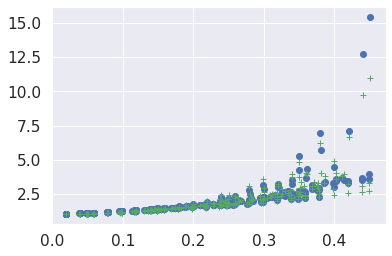

In [ ]:
plt.plot(Xtest, Ytest, 'bo', label='data')
plt.plot(Xtest, Ypredtest, 'g+',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


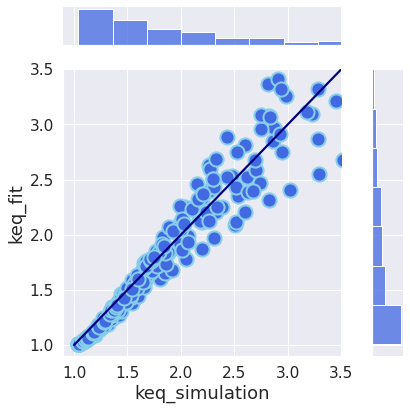

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Ytest,Ypredtest, kind='scatter', xlim=[0.9,3.5], ylim=[0.9,3.5] , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


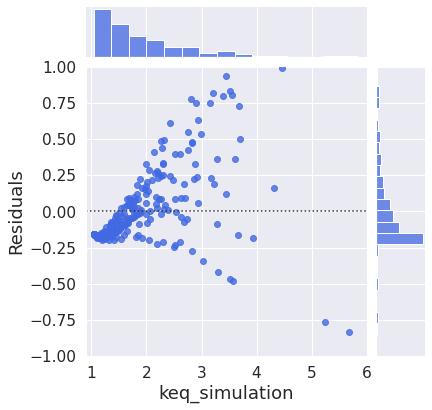

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Ytest,Ypredtest, kind='resid', xlim=[0.90,6.0], ylim=[-1.0,1.0], color='royalblue')
sns_plot.set_axis_labels('keq_simulation', 'Residuals', fontsize=18)

#Coquina

In [41]:
coquina = pd.read_csv('data-imgesim-test5-long-coquina.csv', sep=',')
#summary_properties = pd.read_csv('data_summary.txt', sep=',')
coquina = coquina[(coquina.P_Area<40)]
Xtest = coquina.loc[:,"P_Area_100"]
#Ytest = summary_30.loc[:,"keq_simulation"]
Ytest = coquina.loc[:,"keq_kpm"]

def x_param(summary_30):
  phi_m = summary_30.loc[:,"P_Area_100"]
  lx = summary_30.loc[:,"WAv_Lx"]
  orient = summary_30.loc[:,"Alignment"]
  ecc = summary_30.loc[:,"Eccent"]
  xdata = np.array([phi_m,lx,orient,ecc])#.T
  return xdata
xdatatest = x_param(coquina)

In [42]:
from statistics import mean
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def ErrRel(Y, Y_pred):
  return mean((abs(Y - Y_pred))/Y)*100

def ErrRel2(Y, Y_pred):
  return (sum(abs(Y_pred - Y))/sum(Y))*100

Ypredtest = func(xdatatest, *popt)

print(rmse(Ytest, Ypredtest),r2_score(Ytest, Ypredtest),ErrRel(Ytest, Ypredtest),ErrRel2(Ytest, Ypredtest))


0.22974085428336985 0.9893633480773716 5.243081623985815 6.1793487862323495


In [43]:
def model_deviation(Y,Ypred,popt):
  SSE = sum((Y - Ypred)**2)
  sA = len(Y)
  sCTE = len(popt)
  sCoef = sCTE - 1
  DFE = sA - sCTE - 1
  MSE = SSE/DFE
  S = sqrt(MSE)
  RMSE = sqrt(mean((Y - Ypred)**2))
  RMSE2 = sqrt(sum((Y - Ypred)**2)/(sA - sCTE))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(np.sqrt((Y - Ypred)**2))/sum(Y))*100
  print(RMSE,RMSE2,S,ErrRel,ErrRel2)
  return

model_deviation(Ytest,Ypredtest,popt)

0.22974085428336985 0.31107058721866176 0.34076075519207855 5.243081623985815 6.1793487862323495


In [44]:
import numpy as np

absError = Ypredtest - Ytest

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(Ytest))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 0.22974085428336985
R-squared: 0.9900778466941562


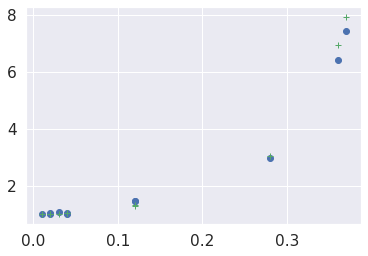

In [ ]:
plt.plot(Xtest, Ytest, 'bo', label='data')
plt.plot(Xtest, Ypredtest, 'g+',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


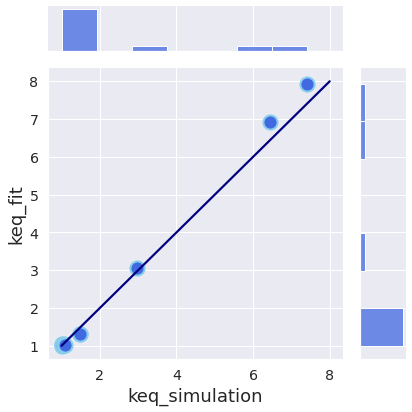

In [ ]:
sns.set(font_scale=1.3)
sns_plot = sns.jointplot(Ytest,Ypredtest, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,8.0], [1,8.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


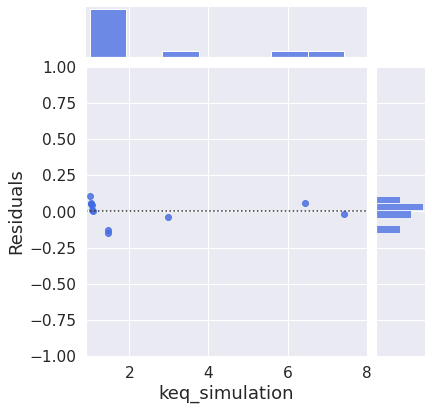

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Ytest,Ypredtest, kind='resid', xlim=[0.90,8.0], ylim=[-1.0,1.0], color='royalblue')
sns_plot.set_axis_labels('keq_simulation', 'Residuals', fontsize=18)

##GD

In [45]:
from pandas._config.config import get_default_val
gd = pd.read_csv('data-all-long-GD-acerto2.csv', sep=',')#1251
#summary_properties = pd.read_csv('data_summary.txt', sep=',')
#summary_30 = summary_properties[(summary_properties.Macroporosity<0.31) & (summary_properties.keq_simulation>0)]
Xtest = gd.loc[:,"P_Area_100"]
#Ytest = summary_30.loc[:,"keq_simulation"]
Ytest = gd.loc[:,"keq_kpm"]

def x_param(summary_30):
  phi_m = summary_30.loc[:,"P_Area_100"]
  lx = summary_30.loc[:,"WAv_Lx"]
  orient = summary_30.loc[:,"Alignment"]
  ecc = summary_30.loc[:,"Eccent"]
  xdata = np.array([phi_m,lx,orient,ecc])#.T
  return xdata
xdatatest = x_param(gd)

In [46]:
from statistics import mean
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def ErrRel(Y, Y_pred):
  return mean((abs(Y - Y_pred))/Y)*100

def ErrRel2(Y, Y_pred):
  return (sum(abs(Y_pred - Y))/sum(Y))*100

Ypredtest = func(xdatatest, *popt)

print(rmse(Ytest, Ypredtest),r2_score(Ytest, Ypredtest),ErrRel(Ytest, Ypredtest),ErrRel2(Ytest, Ypredtest))

0.15994000365649697 0.6764386289794379 9.54478754253738 9.90335099448533


In [47]:
def model_deviation(Y,Ypred,popt):
  SSE = sum((Y - Ypred)**2)
  sA = len(Y)
  sCTE = len(popt)
  sCoef = sCTE - 1
  DFE = sA - sCTE - 1
  MSE = SSE/DFE
  S = sqrt(MSE)
  RMSE = sqrt(mean((Y - Ypred)**2))
  RMSE2 = sqrt(sum((Y - Ypred)**2)/(sA - sCTE))
  ErrRel = mean((abs(Y - Ypred))/Y)*100
  ErrRel2 = (sum(np.sqrt((Y - Ypred)**2))/sum(Y))*100
  print(RMSE,RMSE2,S,ErrRel,ErrRel2)
  return

model_deviation(Ytest,Ypredtest,popt)

0.15994000365649697 0.1846828083305365 0.1911648681472927 9.54478754253738 9.90335099448533


In [48]:
import numpy as np

absError = Ypredtest - Ytest

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(Ytest))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 0.15994000365649697
R-squared: 0.9160563433503273


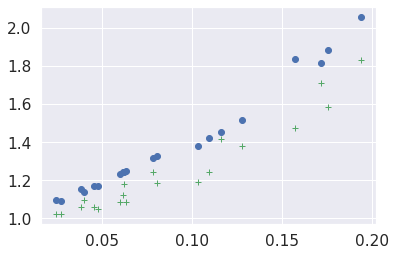

In [ ]:
plt.plot(Xtest, Ytest, 'bo', label='data')
plt.plot(Xtest, Ypredtest, 'g+',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


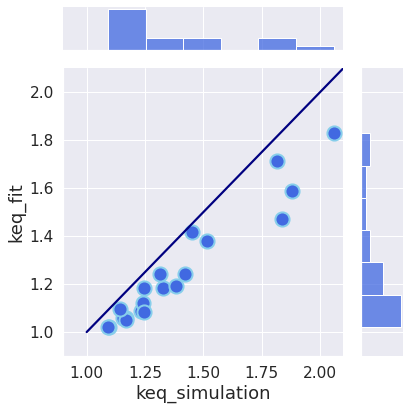

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Ytest,Ypredtest, kind='scatter', xlim=[0.9,2.1], ylim=[0.9,2.1] , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,6.0], [1,6.0], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


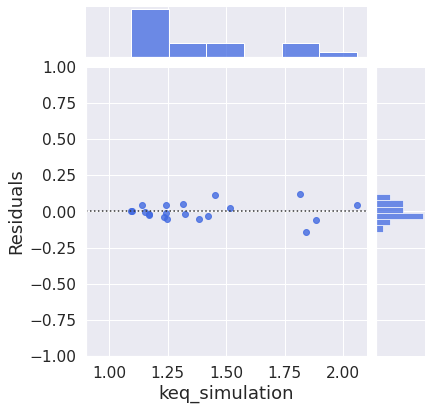

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(Ytest,Ypredtest, kind='resid', xlim=[0.90,2.1], ylim=[-1.0,1.0], color='royalblue')
sns_plot.set_axis_labels('keq_simulation', 'Residuals', fontsize=18)

In [ ]:
plt.figure()
plt.plot(summary_30['P_Area_100'],summary_30["keq_simulation"], "ko", label="Observed")
plt.plot(summary_30['P_Area_100'],summary_30["keq_fit"], "b+", label="OldRegressor")
plt.plot(summary_30['P_Area_100'],keq_fitting2, "r+", label="NewOldRegressor")
plt.plot(summary_30['P_Area_100'],pred1, "gd", label="GradientBoostingRegressor")
plt.plot(summary_30['P_Area_100'],pred2, "b^", label="RandomForestRegressor")
plt.plot(summary_30['P_Area_100'],pred3, "ys", label="LinearRegression")
plt.plot(summary_30['P_Area_100'],pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

# train the model
#clf.fit(old_matlab[['P_Area_100','WAv_Lx','Alignment','Eccent']], old_matlab["keq_kpm"])
clf.fit(summary_30[['P_Area_100','WAv_Lx','Alignment','Eccent']], summary_30["keq_simulation"])
# predict on test data
predict = clf.predict(summary_30[['P_Area_100','WAv_Lx','Alignment','Eccent']])

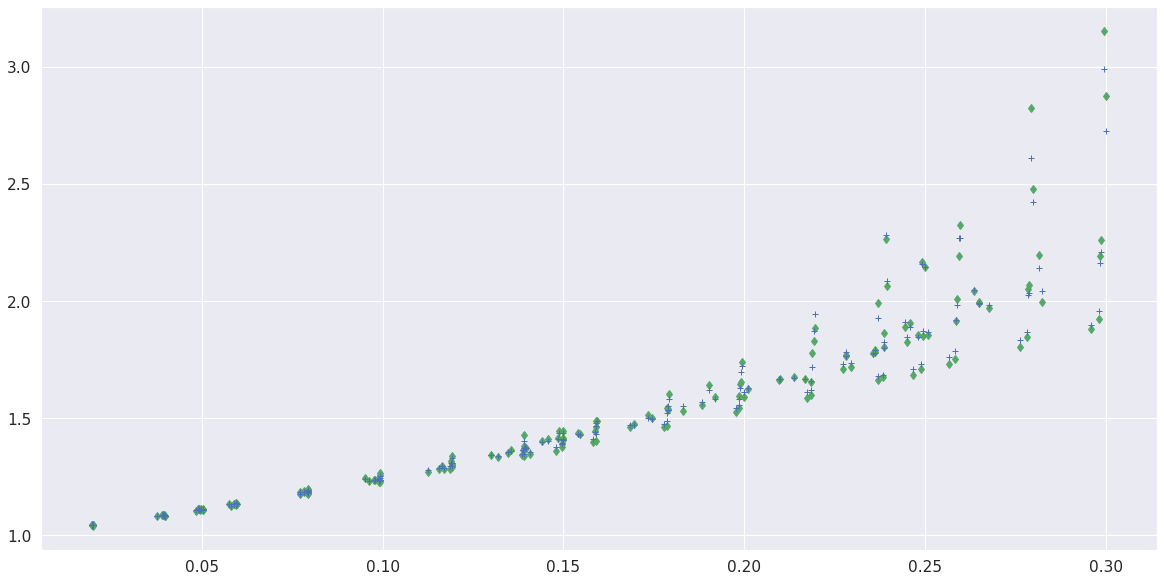

In [ ]:
plt.figure()
plt.plot(summary_30['P_Area_100'],summary_30["keq_simulation"], "gd", label="GradientBoostingRegressor")
plt.plot(summary_30['P_Area_100'],predict, "b+", label="RandomForestRegressor")

(1.0, 3.5)

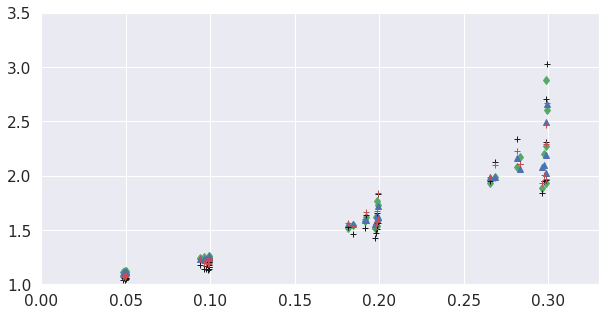

In [ ]:
keq_fitting1 = 1 + (7.0284*(old_matlab['P_Area_100']**1.6597)*(old_matlab['WAv_Lx']**0.4687)*(old_matlab['Alignment']**0.3934)*(old_matlab['Eccent']**0.0809))
keq_fitting12 = 1 + (7.42094623*(old_matlab['P_Area_100']**1.44416606)*(old_matlab['WAv_Lx']**0.31225655)*(old_matlab['Alignment']**0.60967486)*(old_matlab['Eccent']**0.07001172))
keq_fitting2 = 1 + (7.42094623*(summary_properties['P_Area_100']**1.44416606)*(summary_properties['WAv_Lx']**0.31225655)*(summary_properties['Alignment']**0.60967486)*(summary_properties['Eccent']**0.07001172))
#7.42094623, 1.44416606, 0.31225655, 0.60967486, 0.07001172
predict2 = clf.predict(old_matlab[['P_Area_100','WAv_Lx','Alignment','Eccent']])
plt.figure(figsize=[10,5])
plt.plot(old_matlab['P_Area_100'],old_matlab["keq_kpm"], "gd", label="GradientBoostingRegressor")
plt.plot(old_matlab['P_Area_100'],predict2, "b^", label="RandomForestRegressor")
plt.plot(old_matlab['P_Area_100'],keq_fitting1, "k+", label="OldRegressor")
plt.plot(old_matlab['P_Area_100'],keq_fitting12, "r+", label="OldRegressor")
plt.xlim([0, 0.33])
plt.ylim([1.0, 3.5])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X = old_matlab[['P_Area_100','WAv_Lx','Alignment','Eccent']]
y = old_matlab["keq_kpm"]

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

pred1 = reg1.predict(X)
pred2 = reg2.predict(X)
pred3 = reg3.predict(X)
pred4 = ereg.predict(X)

In [ ]:
reg1.get_params()
print(reg1.feature_importances_)

[0.88614967 0.04498839 0.00479157 0.06407037]


In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


Y = old_matlab["keq_kpm"]
Ypred = keq_fitting1
print(rmse(Y, Ypred),r2_score(Y, Ypred),ErrRel(Y, Ypred),ErrRel2(Y, Ypred))
print(rmse(Y, keq_fitting12),r2_score(Y, keq_fitting12),ErrRel(Y, keq_fitting12),ErrRel2(Y, keq_fitting12))
print(rmse(Y, pred1),r2_score(Y, pred1),ErrRel(Y, pred1),ErrRel2(Y, pred1))
print(rmse(Y, pred2),r2_score(Y, pred2),ErrRel(Y, pred2),ErrRel2(Y, pred2))
print(rmse(Y, pred3),r2_score(Y, pred3),ErrRel(Y, pred3),ErrRel2(Y, pred3))
print(rmse(Y, pred4),r2_score(Y, pred4),ErrRel(Y, pred4),ErrRel2(Y, pred4))
data = {"Models":  ["matlab", "nlinfit", "GradientBoostingRegressor","RandomForestRegressor","LinearRegression","VotingRegressor"],
        'RMSE': [rmse(Y, Ypred), rmse(Y, keq_fitting12), rmse(Y, pred1),rmse(Y, pred2),rmse(Y, pred3),rmse(Y, pred4)],
        'R2': [r2_score(Y, Ypred), r2_score(Y, keq_fitting12), r2_score(Y, pred1),r2_score(Y, pred2),r2_score(Y, pred3),r2_score(Y, pred4)],
        'ErrRel': [ErrRel(Y, Ypred), ErrRel(Y, keq_fitting12), ErrRel(Y, pred1),ErrRel(Y, pred2),ErrRel(Y, pred3),ErrRel(Y, pred4)],
        'ErrRel2': [ErrRel2(Y, Ypred), ErrRel2(Y, keq_fitting12), ErrRel2(Y, pred1),ErrRel2(Y, pred2),ErrRel2(Y, pred3),ErrRel2(Y, pred4)],
        }

0.11727065982277866 0.931472475760509 nan 5.796800761495892
0.08932615833753302 0.9602402524942074 nan 3.7905513382334632
0.0008091486340259935 0.9999967375571315 nan 0.04199965468028382
0.056391351287232355 0.9841543044412697 nan 1.8264261335933756
0.11247269420111632 0.9369651822610419 nan 5.366211844444549
0.05202584389695889 0.986512713856097 nan 2.284786255352244


In [ ]:
df = pd.DataFrame(data)
df

,Models,RMSE,R2,ErrRel,ErrRel2
0,matlab,0.117271,0.931472,NaN,5.796801
1,nlinfit,0.089326,0.960240,NaN,3.790551
2,GradientBoostingRegressor,0.000809,0.999997,NaN,0.042000
3,RandomForestRegressor,0.056391,0.984154,NaN,1.826426
4,LinearRegression,0.112473,0.936965,NaN,5.366212
5,VotingRegressor,0.052026,0.986513,NaN,2.284786


In [ ]:
X2 = summary_30[['P_Area_100','WAv_Lx','Alignment','Eccent']]
pred1 = reg1.predict(X2)
pred2 = reg2.predict(X2)
pred3 = reg3.predict(X2)
pred4 = ereg.predict(X2)

In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2
def ErrRel(Y, Y_pred):
  return mean((abs(Y - Y_pred))/Y2)*100
def ErrRel2(Y, Y_pred):
  return (sum(abs(Y_pred - Y))/sum(Y))*100


Y2 = summary_30["keq_simulation"]
Ypred2 = summary_30["keq_fit"]
print(rmse(Y2, Ypred2),r2_score(Y2, Ypred2),ErrRel(Y2, Ypred2),ErrRel2(Y2, Ypred2))
print(rmse(Y2, keq_fitting2),r2_score(Y2, keq_fitting2),ErrRel(Y2, keq_fitting2),ErrRel2(Y2, keq_fitting2))
print(rmse(Y2, pred1),r2_score(Y2, pred1),ErrRel(Y2, pred1),ErrRel2(Y2, pred1))
print(rmse(Y2, pred2),r2_score(Y2, pred2),ErrRel(Y2, pred2),ErrRel2(Y2, pred2))
print(rmse(Y2, pred3),r2_score(Y2, pred3),ErrRel(Y2, pred3),ErrRel2(Y2, pred3))
print(rmse(Y2, pred4),r2_score(Y2, pred4),ErrRel(Y2, pred4),ErrRel2(Y2, pred4))
data2 = {"Models":  ["matlab", "nlinfit", "GradientBoostingRegressor","RandomForestRegressor","LinearRegression","VotingRegressor"],
        'RMSE': [rmse(Y2, Ypred2), rmse(Y2, keq_fitting2), rmse(Y2, pred1),rmse(Y2, pred2),rmse(Y2, pred3),rmse(Y2, pred4)],
        'R2': [r2_score(Y2, Ypred2), r2_score(Y2, keq_fitting2), r2_score(Y2, pred1),r2_score(Y2, pred2),r2_score(Y2, pred3),r2_score(Y2, pred4)],
        'ErrRel': [ErrRel(Y2, Ypred2), ErrRel(Y2, keq_fitting2), ErrRel(Y2, pred1),ErrRel(Y2, pred2),ErrRel(Y2, pred3),ErrRel(Y2, pred4)],
        'ErrRel2': [ErrRel2(Y2, Ypred2), ErrRel2(Y2, keq_fitting2), ErrRel2(Y2, pred1),ErrRel2(Y2, pred2),ErrRel2(Y2, pred3),ErrRel2(Y2, pred4)],
        }
df2 = pd.DataFrame(data2)
df2

0.09877283607686208 0.9336373061212964 5.093033246979987 5.20152167143997
0.06117871157283593 0.9745405151232805 2.8093074608781508 2.998921816262439
0.10346371909805899 0.927184282998967 4.558434619804579 4.84433203456807
0.11618016319970975 0.9081851511196761 5.141496237233853 5.4361938728931
0.11172620606102752 0.91508995671071 5.924665691575226 5.825558968315474
0.09098422041031545 0.9436905719926122 3.7865876065942197 4.119407164128264


,Models,RMSE,R2,ErrRel,ErrRel2
0,matlab,0.098773,0.933637,5.093033,5.201522
1,nlinfit,0.061179,0.974541,2.809307,2.998922
2,GradientBoostingRegressor,0.103464,0.927184,4.558435,4.844332
3,RandomForestRegressor,0.116180,0.908185,5.141496,5.436194
4,LinearRegression,0.111726,0.915090,5.924666,5.825559
5,VotingRegressor,0.090984,0.943691,3.786588,4.119407


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X = summary_30[['P_Area_100','WAv_Lx','Alignment','Eccent']]
y = summary_30["keq_simulation"]

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [ ]:
xt = X[:20]

pred1 = reg1.predict(X)
pred2 = reg2.predict(X)
pred3 = reg3.predict(X)
pred4 = ereg.predict(X)

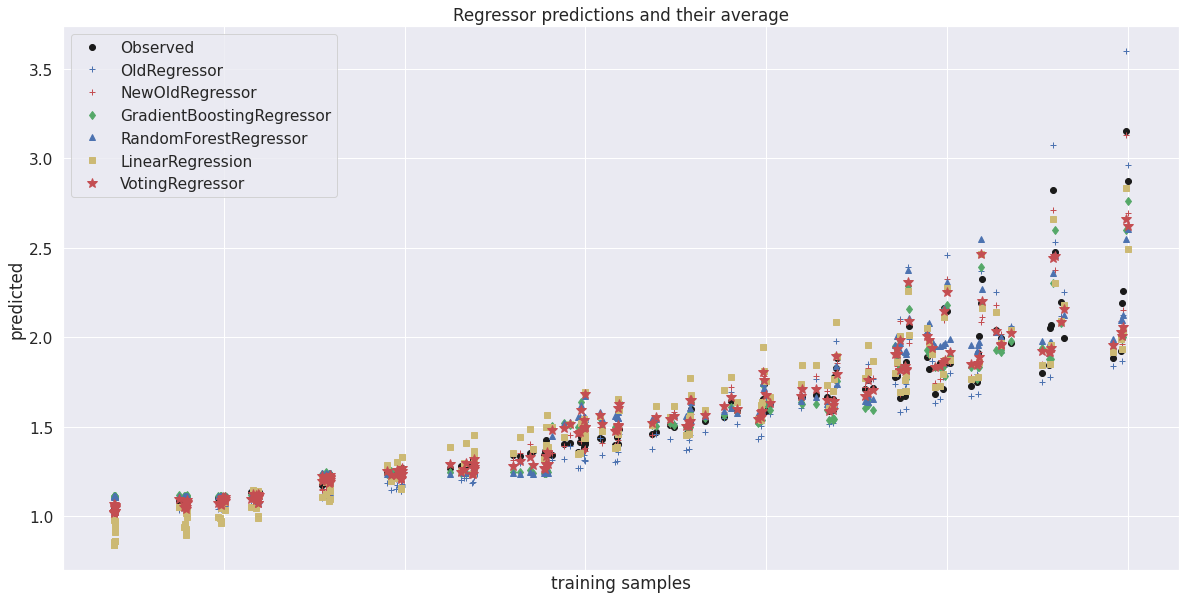

In [ ]:
plt.figure()
plt.plot(summary_30['P_Area_100'],summary_30["keq_simulation"], "ko", label="Observed")
plt.plot(summary_30['P_Area_100'],summary_30["keq_fit"], "b+", label="OldRegressor")
plt.plot(summary_30['P_Area_100'],keq_fitting2, "r+", label="NewOldRegressor")
plt.plot(summary_30['P_Area_100'],pred1, "gd", label="GradientBoostingRegressor")
plt.plot(summary_30['P_Area_100'],pred2, "b^", label="RandomForestRegressor")
plt.plot(summary_30['P_Area_100'],pred3, "ys", label="LinearRegression")
plt.plot(summary_30['P_Area_100'],pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [ ]:
Y = summary_30["keq_simulation"]
Ypred = summary_30["keq_fit"]
print(rmse(Y, Ypred),r2_score(Y, Ypred))
print(rmse(Y, keq_fitting2),r2_score(Y, keq_fitting2))
print(rmse(Y, pred1),r2_score(Y, pred1))
print(rmse(Y, pred2),r2_score(Y, pred2))
print(rmse(Y, pred3),r2_score(Y, pred3))
print(rmse(Y, pred4),r2_score(Y, pred4))

0.09877283607686208 0.9336373061212964
0.06117871157283593 0.9745405151232805
0.006930060010625116 0.9996733196967089
0.0314965994849849 0.9932519810238618
0.08952350595814533 0.9454841079231622
0.036612670048402525 0.9908817443816367


In [ ]:
# library & dataset
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
#df = sns.load_dataset('iris')

### Test A ###
# Path
dir_name = "/mnt/c/Users/Monique/Documents/UPython/"
folder = "Long/resultados/NN/"
sample_name = "Am5_c12"
file_name = "Train_"+sample_name+"_Test_Same_TestGroupEval"
headers = ['','PredictedPermGain','RealPermGain','GlobalError','RMSError']
df = pd.read_csv(dir_name + folder + file_name +".csv", sep=';', index_col= 0,header=0)

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns_plot = sns.jointplot(x=df["RealPermGain"], y=df["PredictedPermGain"], kind='scatter', xlim=[0.9,2.0], ylim=[0.9,2.0], s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.savefig(dir_name + folder + sample_name + "-marginal_plot.png")
print(stat.pearsonr(x=df["RealPermGain"], y=df["PredictedPermGain"]))
print(stat.linregress(x=df["RealPermGain"], y=df["PredictedPermGain"]))

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns_plot = sns.jointplot(x=df["RealPermGain"], y=df["PredictedPermGain"], kind='resid', ylim=[-1.0,1.0], color='royalblue')
sns_plot.savefig(dir_name + folder + sample_name + "-residual_plot.png")
print(stat.pearsonr(x=df["RealPermGain"], y=df["PredictedPermGain"]))
res = df["RealPermGain"] - df["PredictedPermGain"]
print(stat.bayes_mvs(res, alpha=0.95))
 
### Test B ###
# Path
sample_name2 = "Am5"
file_name2 = "Train_"+sample_name2+"_Test_Same_TestGroupEval"
headers = ['','PredictedPermGain','RealPermGain','GlobalError','RMSError']
df2 = pd.read_csv(dir_name + folder + file_name2 +".csv",sep=';' ,index_col= 0,header=0)

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns_plot2 = sns.jointplot(x=df2["RealPermGain"], y=df2["PredictedPermGain"], kind='scatter', s=200, color="darkorange", edgecolor="navajowhite", linewidth=2)
sns_plot2.savefig(dir_name + folder + sample_name2 + "-marginal_plot--testing.png")

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns_plot2 = sns.jointplot(x=df2["RealPermGain"], y=df2["PredictedPermGain"], kind='resid', ylim=[-1.0,1.0], color='darkorange')
sns_plot2.savefig(dir_name + folder + sample_name2 + "-residual_plot--testing.png")
res = df2["RealPermGain"] - df2["PredictedPermGain"] #Residual = observed value – predicted value
print(stat.pearsonr(x=df2["RealPermGain"], y=df2["PredictedPermGain"]))
print(stat.linregress(x=df2["RealPermGain"], y=df2["PredictedPermGain"]))
print(stat.bayes_mvs(res, alpha=0.95))

 
# Method 1: on the same Axis
#ax = sns.distplot(df2["RealPermGain"])
#sns_hist = sns.distplot(df2["RealPermGain"], color="red", label="Sepal Width")
#sns.plt.legend()
#ax.savefig(dir_name + folder + sample_name + "-hist_plot.png")
df = sns.load_dataset('iris')
 
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns_hist = sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])
sns_hist.savefig(dir_name + folder + sample_name + "-hist_plot--testing.png")

Summary

In [ ]:
summary_properties = pd.read_csv('data_summary.txt', sep=',')
summary_properties.head()

,Macroporosity,Vugs,Sample,Grid,R,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,keq_fit,keq_simulation,Relative_error2
0,0.02,35,aleatory,grid-10,r1,0.019577,1.95762,0.630302,0.046894,0.147216,1.01005,1.04175,0.030430
1,0.02,35,aleatory,grid-15,r1,0.019743,1.98451,0.598945,0.054035,0.154857,1.01010,1.04186,0.030489
2,0.02,35,aleatory,grid-19,r1,0.019828,2.12784,0.636082,0.114909,0.212025,1.01104,1.04273,0.030399
3,0.02,35,aleatory,grid-20,r1,0.019792,1.91568,0.533688,0.010000,0.116170,1.00931,1.04259,0.031917
4,0.02,35,aleatory,grid-30,r1,0.019753,1.91088,0.610818,0.010000,0.122273,1.00981,1.04129,0.030228


In [ ]:
summary_properties = summary_properties[(summary_properties.Macroporosity<0.31)&(summary_properties.keq_simulation>0)]
summary_properties

,Macroporosity,Vugs,Sample,Grid,R,P_Area_100,WAv_Lx,Alignment,Alignment2,Eccent,keq_fit,keq_simulation,Relative_error2
0,0.02,35,aleatory,grid-10,r1,0.019577,1.95762,0.630302,0.046894,0.147216,1.01005,1.04175,0.030430
1,0.02,35,aleatory,grid-15,r1,0.019743,1.98451,0.598945,0.054035,0.154857,1.01010,1.04186,0.030489
2,0.02,35,aleatory,grid-19,r1,0.019828,2.12784,0.636082,0.114909,0.212025,1.01104,1.04273,0.030399
3,0.02,35,aleatory,grid-20,r1,0.019792,1.91568,0.533688,0.010000,0.116170,1.00931,1.04259,0.031917
4,0.02,35,aleatory,grid-30,r1,0.019753,1.91088,0.610818,0.010000,0.122273,1.00981,1.04129,0.030228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.30,225,aleatory,grid-15,r2,0.267632,3.94005,0.488217,0.244465,0.462765,2.06238,1.96961,0.047100
212,0.30,225,aleatory,grid-23,r2,0.282268,4.82450,0.455592,0.241310,0.532754,2.25607,1.99579,0.130412
213,0.30,225,aleatory,grid-29,r2,0.299406,13.91790,0.610469,0.514834,0.669517,3.60126,3.15156,0.142691
214,0.30,225,aleatory,grid-30,r2,0.298752,3.19090,0.549629,0.064453,0.190413,2.12638,2.26170,0.059831


In [ ]:
keq_simulation = summary_properties.loc[:,"keq_simulation"]
phi_m = summary_properties.loc[:,"P_Area_100"]
lx = summary_properties.loc[:,"WAv_Lx"]
orient = summary_properties.loc[:,"Alignment"]
orient2 = summary_properties.loc[:,"Alignment2"]
ecc = summary_properties.loc[:,"Eccent"]

In [ ]:
m = len(keq_simulation)
x0 = np.ones(m)
X = np.array([x0,phi_m,lx,orient,ecc]).T

# Initial Coefficients
B = np.array([0, 0, 0, 0, 0])
Y = np.array(keq_simulation)
alpha = 0.0001

In [ ]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J
inital_cost = cost_function(X, Y, B)
print(inital_cost)

1.1998024113827777


In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [ ]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[0.70461415 0.26459038 0.15404793 0.4112772  0.11743236]
0.035879112590053094


In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

0.2678772576761718
0.511886692594806


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


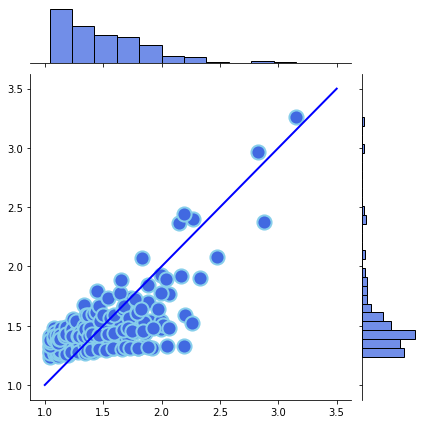

In [ ]:
sns_plot = sns.jointplot(Y,Y_pred, kind='scatter', s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,3.5], [1,3.5], color="b", linewidth = 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


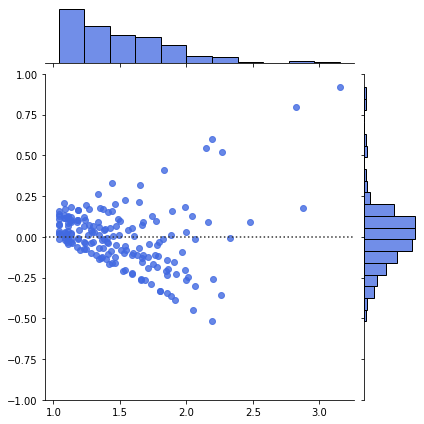

In [ ]:
sns.jointplot(Y, Y_pred, kind='resid', ylim=[-1.0,1.0], color='royalblue')

Nlinfit

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# choose the input and output variables
def func(x, a, b, c, d, e):
    return 1 + (a*(x[0]**b)*(x[1]**c)*(x[2]**d)*(x[3]**e))
xdata = np.array([phi_m,lx,orient,ecc])#.T
y = func(xdata, 2.5, 1.3, 0.5, 2.0, 0.2)
ydata = np.array(keq_simulation)
print(len(xdata[0]),len(y),len(ydata))

180 180 180


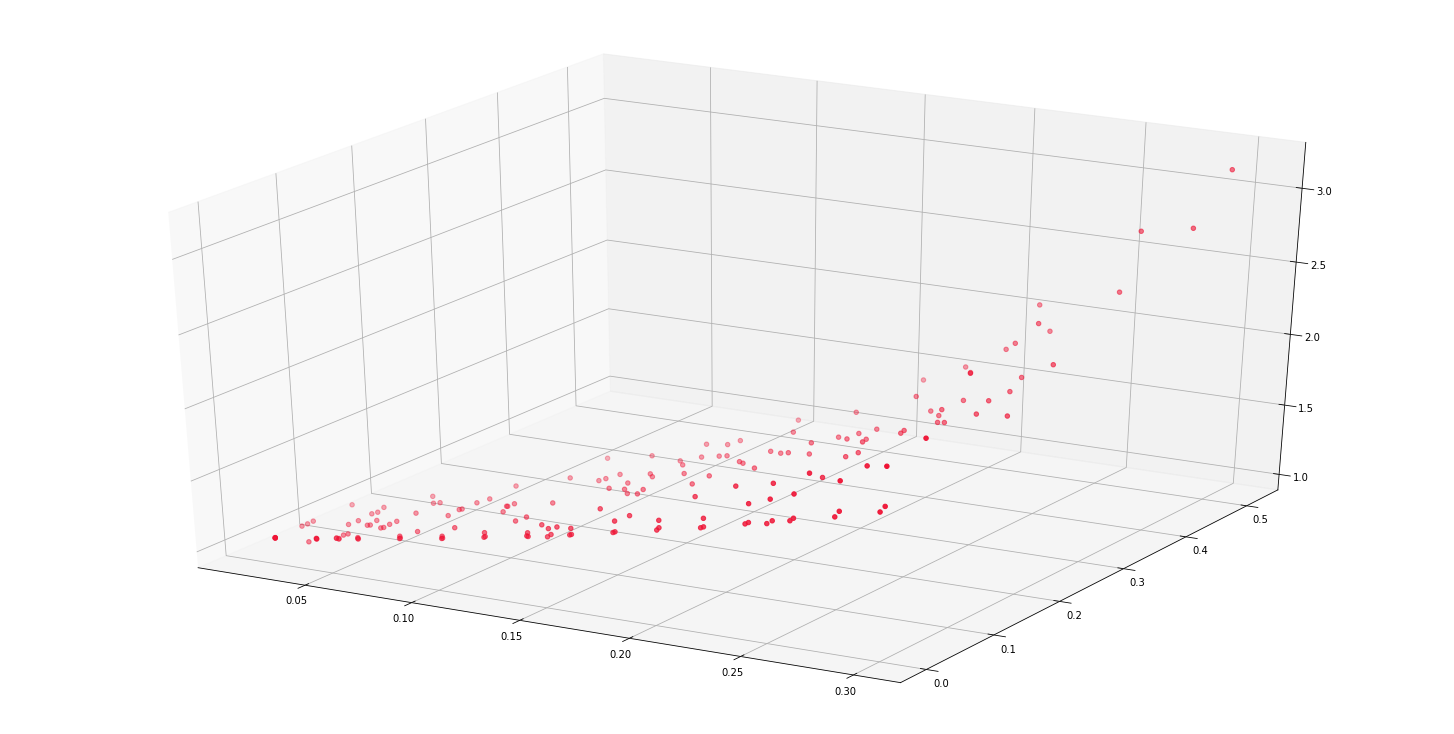

In [ ]:
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(phi_m,orient2,ydata, color='#ef1234')
plt.show()

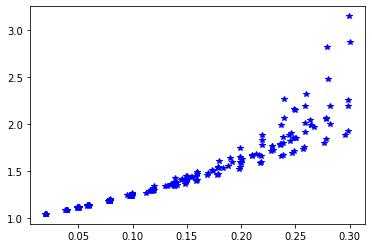

In [ ]:
plt.plot(xdata[0], ydata, 'bo', label='data')

In [ ]:
# curve fit
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([7.42094623, 1.44416606, 0.31225655, 0.60967486, 0.07001172])

In [ ]:
# summarize the parameter values
a, b, c, d, e = popt

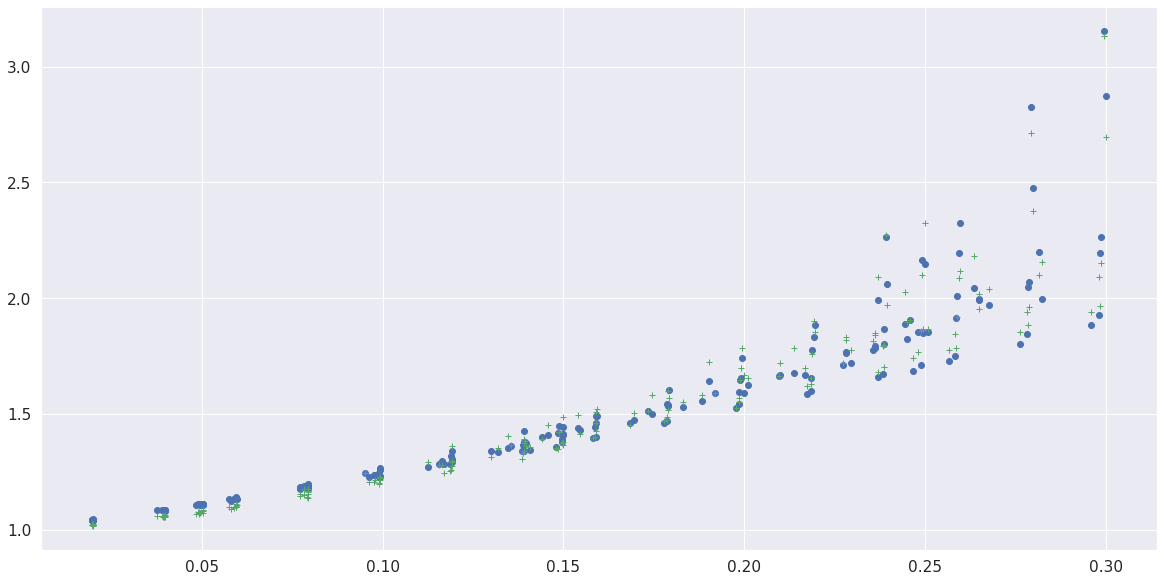

In [ ]:
plt.plot(xdata[0], ydata, 'bo', label='data')
plt.plot(xdata[0], func(xdata, *popt), 'g+',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))

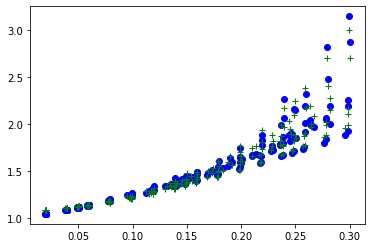

In [ ]:
plt.plot(xdata[0], ydata, 'bo', label='data')
plt.plot(xdata[0], func(xdata, *popt), 'g+',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % tuple(popt))

In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = func(xdata, *popt)

print(rmse(ydata, Y_pred))
print(r2_score(ydata, Y_pred))

0.07123690325662352
0.9654809350338285


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model Evaluation
rmse = np.sqrt(mean_squared_error(ydata, Y_pred))
#r2 = reg.score(X, Y)
print(rmse)
#print(r2)

0.07123690325662352


In [ ]:
m = len(ydata)
numer = 0
denom = 0
ErrRel = mean((abs(ydata - Y_pred))/ydata)*100
#ErrRel2 = sum(sqrt((Y - Y_pred)**2))/sum(Y)
for i in range(m):
    numer += sqrt((ydata[i] - Y_pred[i])**2)
    denom += ydata[i]
ErrRel2 = (numer/denom)*100
print(ErrRel,ErrRel2)

3.2598758566706723 3.504783353515569


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


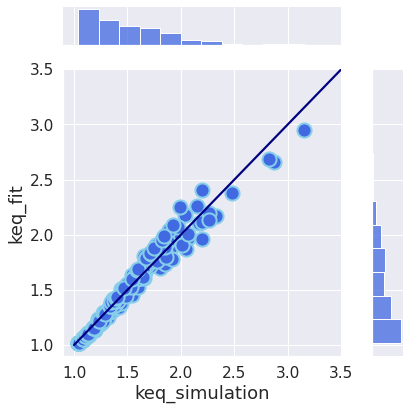

In [ ]:
sns.set(font_scale=1.4)
sns_plot = sns.jointplot(ydata,Y_pred, kind='scatter', xlim=[0.9,3.5], ylim=[0.9,3.5] , s=200, color="royalblue", edgecolor="skyblue", linewidth=2)
sns_plot.ax_joint.plot([1,3.5], [1,3.5], color="navy", linewidth = 2.2)
# JointGrid has a convenience function
sns_plot.set_axis_labels('keq_simulation', 'keq_fit', fontsize=18)
# also possible to manipulate the histogram plots this way, e.g.
#sns_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
sns_plot.figure.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


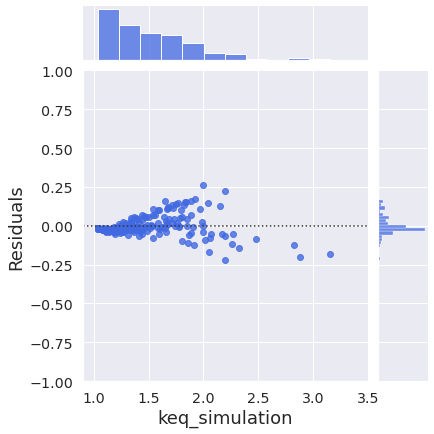

In [ ]:
sns.set(font_scale=1.3)
sns_plot = sns.jointplot(ydata, Y_pred, kind='resid', xlim=[0.9,3.5], ylim=[-1.0,1.0], color='royalblue')
sns_plot.set_axis_labels('keq_simulation','Residuals', fontsize=18)

In [ ]:
def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])

In [ ]:
from scipy.optimize import least_squares
x0_rosenbrock = np.array([2, 2])
res_1 = least_squares(fun_rosenbrock, x0_rosenbrock)
res_1.x
res_1.cost
res_1.optimality


8.892886493421953e-14

In [ ]:
# choose the input and output variables
def fun(x, b):
    #return 1 + (a*(x[0]**b)*(x[1]**c)*(x[2]**d)*(x[3]**e))
    return 1.0 + b[0]*(x[0]**b[1])*(x[1]**b[2])*(x[2]**b[3])*(x[3]**b[4])
xdata = np.array([phi_m,lx,orient2,ecc])#.T
b = np.array([2.5, 1.3, 0.5, 2.0, 0.2])
y = fun(xdata,b)
ydata = np.array(keq_simulation)

print(len(xdata[0]),len(y),len(ydata))
y

180 180 180


array([1.00003154, 1.00004307, 1.00021596, 1.00000137, 1.00000138,
       1.00029365, 1.00011223, 1.00038945, 1.00000339, 1.0000034 ,
       1.0000231 , 1.00022276, 1.00121745, 1.0000045 , 1.0000045 ,
       1.00099837, 1.00019776, 1.00117511, 1.00000581, 1.00000577,
       1.00094505, 1.00099066, 1.00347018, 1.00000845, 1.00000838,
       1.00155369, 1.00155917, 1.00574233, 1.00001141, 1.00001115,
       1.00220349, 1.00655362, 1.00865924, 1.00001435, 1.00001409,
       1.00478743, 1.00871608, 1.02096897, 1.00001765, 1.00001711,
       1.00483449, 1.01223465, 1.02221337, 1.0000191 , 1.00001877,
       1.0048717 , 1.00941922, 1.0434598 , 1.00002102, 1.00002052,
       1.00680436, 1.01416446, 1.03055831, 1.00002434, 1.00002377,
       1.01987915, 1.01854442, 1.09094058, 1.00002794, 1.00002724,
       1.02870032, 1.03264612, 1.09927717, 1.00003162, 1.00003063,
       1.02918543, 1.05273514, 1.11371851, 1.00003578, 1.00003462,
       1.0165621 , 1.05112578, 1.11881851, 1.0000375 , 1.00003

In [ ]:
from scipy.optimize import least_squares
res_soft_l1 = least_squares(fun, b, loss='soft_l1', f_scale=0.1, args=(xdata))

TypeError: ignored

In [ ]:
summary_30 = summary_properties[(summary_properties.keq_simulation>0)]
X30 = summary_30.loc[:,"P_Area_100"]
Y30 = summary_30.loc[:,"keq_simulation"]
Y_pred30 = summary_30.loc[:,"keq_fit"]

# Mean X and Y
#mean_x = np.mean(X)
mean_y30 = np.mean(Y)

# Total number of values
m30 = len(Y30)

# Calculating Root Mean Squares Error
""" ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = 1 + b0* X[i] + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2) """

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

#Y_pred = X.dot(newB)

print(rmse(Y30, Y_pred30))
print(r2_score(Y30, Y_pred30))

0.42082254176846834
0.9128351356121001


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#reg = LinearRegression()
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y30, Y_pred30))
#r2 = reg.score(X, Y)
print(rmse)
#print(r2)
summary_30.Relative_error2.max()


0.4208225417684684


0.290277

In [ ]:
ErrRel = mean((abs(Y30 - Y_pred30))/Y30)*100
numer2 = 0
denom2 = 0
ErrRel2 = (sum(abs(Y_pred30 - Y30))/sum(Y30))*100
'''
for i in range(m30):
    print(Y30[i],Y_pred30[i])
    numer2 += sqrt((Y30[i] - Y_pred30[i])**2)
    denom2 += Y30[i]
ErrRel2 = (numer2/denom2)*100
#ErrRel2 = sum(sqrt((Y30 - Y_pred30)**2))/sum(Y30)
print(ErrRel,ErrRel2)
'''
print(ErrRel,ErrRel2)

6.693066748308686 8.748503178202846
